# Amazon reviews classification project
## Introduction
In this project, I explore two different methods for classifying correctly whether product reviews from Amazon are positive or negative, both belonging to naive Bayes method family: the Bernoulli naive Bayes method and the Multinomial naive Bayes method.

I employ different datasets containing the text of product reviews and corresponding product ratings assigned by each reviewer.

## Load the Data
I use data from http://jmcauley.ucsd.edu/data/amazon/ .

To begin, I use the subset of Toys and Games data.

First, I need to import package I will use:

In [12]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from wordcloud import WordCloud, STOPWORDS

from scipy import stats

Then, I load the data in Panda DataFrame structure:

In [21]:
#Load dataset in a panda DataFrame
df = pd.read_json('./Dataset/Toys_and_Games_5.json',lines=True)

Let's take a first look at the data.
Visualize the first three rows of the dataset and get it's dimension:


In [19]:
#Look at the data
print("Dataset dimension: ", df.shape, "\n")

Dataset dimension:  (167597, 9) 



In [24]:
df.iloc[0:3]

reviewerID        asin    reviewerName helpful  \
0  A1VXOAVRGKGEAK  0439893577           Angie  [0, 0]   
1   A8R62G708TSCM  0439893577         Candace  [1, 1]   
2  A21KH420DK0ICA  0439893577  capemaychristy  [1, 1]   

                                          reviewText  overall  \
0  I like the item pricing. My granddaughter want...        5   
1  Love the magnet easel... great for moving to d...        4   
2  Both sides are magnetic.  A real plus when you...        5   

                                             summary  unixReviewTime  \
0                                     Magnetic board      1390953600   
1  it works pretty good for moving to different a...      1395964800   
2                                         love this!      1359331200   

    reviewTime  
0  01 29, 2014  
1  03 28, 2014  
2  01 28, 2013

## Better organize the data 
For our project, we focus our attention only on "reviewText" attribute and "overall" attribute. Even "summary" is an interesting attribute to focus on.

Modify the structure of dataset to include only columns of our interest: 

In [22]:
dataset = pd.DataFrame()
dataset["overall"] = df["overall"]
dataset["reviewText"] = df["reviewText"]
dataset["summary"] = df["summary"]

Our dataset has now the form

In [23]:
dataset.iloc[0:5]

overall                                         reviewText  \
0        5  I like the item pricing. My granddaughter want...   
1        4  Love the magnet easel... great for moving to d...   
2        5  Both sides are magnetic.  A real plus when you...   
3        5  Bought one a few years ago for my daughter and...   
4        4  I have a stainless steel refrigerator therefor...   

                                             summary  
0                                     Magnetic board  
1  it works pretty good for moving to different a...  
2                                         love this!  
3                                  Daughters love it  
4  Great to have so he can play with his alphabet...

## Data cleaning and text preprocessing
Text is just a sequence of words (or characters). When we deal with language modelling we are more concerned about the words as a whole, instead of just worrying about character-level depth of our text data.
So we need to put text into a form that is more predictable and analyzable.
Below we explore the basic steps of text preprocessing. These steps are needed for transferring text from human language to machine-readable format for further processing.

We start to apply this techniques to a single sentence, for visualizing how this affect the text. Then we apply the same techniques at all dataset.

### Remove non-letter characters and convert reviews to lower Case


It may be important to include some punctuations and numbers. However, for simplicity, we remove both of them.

In the following code, we substitute all the characters different from a-z and from A-Z to spaces.
Then we convert any capital letters to lower case.

In [33]:
#Remove non-letter characters 
review = dataset.iloc[0]["reviewText"]
print("Original review: ", review)

#Convert reviews to lower case
letter = re.sub("[^a-zA-Z]", " ", review)
letter = letter.lower()
print("Processed review: ",letter)

Original review:  I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters.
Processed review:  i like the item pricing  my granddaughter wanted to mark on it but i wanted it just for the letters 


### Tokenization
Tokenization is the process of splitting a sentence or paragraph into a list of word.

We use the function provided by the Natural Language Toolkit(NLTK) library for doing so:

In [41]:
word = nltk.word_tokenize(letter)
print("Tokenized review: ", word)

Tokenized review:  ['i', 'like', 'the', 'item', 'pricing', 'my', 'granddaughter', 'wanted', 'to', 'mark', 'on', 'it', 'but', 'i', 'wanted', 'it', 'just', 'for', 'the', 'letters']


### Remove stop-words
Stop words are generally the most common words in a language.Stop words consume many computational resources (memory space, search time) and do not add any semantic value to the text. So, they are filtered out before processing a text.

There is no single universal list of stop words for all language. We use one provided by the NLTK library.

In [40]:
#Remove stop-words
print("List of english stop-words: \n")
print(stopwords.words("english"), "\n")
wordSW = [w for w in word if not w in set(stopwords.words("english"))]
print("Original review: ", word, "\n")
print("Processed review: ", wordSW, "\n")

List of english stop-words: 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

### Stemming and Lemmization
It is useful to know the difference between these two.

* **Stemming**: Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. 

  _example) studying -> study; studied -> studi_
  
* **Lemmatization**: Lemmatization is the process of converting the words of a sentence to its dictionary form. 

  _example) studying -> study, studied -> study._
  
  Lemmatization also discerns the meaning of the word by understanding the context of a passage. 

  _example) if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet"._

Usually, either one of them is chosen for text-analysis. I use stemming. In a future work can be interesting evaluate which is the best choice between these two methodologies with this given dataset and naive Bayes method.

There are three major Stemming alghorithms: Porter, Snowball and Lancaster. Lancaster is the most aggressive among the three and Porter is the least aggressive ("aggressive" means how much a working set of words are reduced). The more aggressive the algorithms, the faster it is. However, in some certain circumstances, it will hugely trim down your working set. Therefore, in this project I decide to use Snowball since it is slightly faster than Porter and does not trim down too much information as Lancaster does.

In [43]:
#Lemmization
snow = nltk.stem.SnowballStemmer("english")
stems = [snow.stem(w) for w in wordSW]
print("Original review: ", wordSW, "\n")
print("Processed review: ", stems, "\n")

Original review:  ['like', 'item', 'pricing', 'granddaughter', 'wanted', 'mark', 'wanted', 'letters'] 

Processed review:  ['like', 'item', 'price', 'granddaught', 'want', 'mark', 'want', 'letter'] 



### Clean all dataset
So far, we have cleaned only one datapoint. Now it's time to apply all the cleaning process to all the data.
To make the code reusable, we create a simple function.

In [15]:
#Apply data cleaning and text preprocessing to all dataset
def cleaning(rawReview):
    #1. Remove non-letters
    letters = re.sub("[^a-zA-Z]", " ", rawReview) 
    
    #2. Convert to lower case
    letters = letters.lower()
    
    #3. Tokenize
    tokens = nltk.word_tokenize(letters)
    
    #4. Convert the stopwords list to "set" data type
    stops = set(nltk.corpus.stopwords.words("english"))
    
    #5. Remove stop words
    words = [w for w in tokens if not w in stops]
    
    #6. Stemming
    words = [nltk.stem.SnowballStemmer("english").stem(w) for w in words] 
    
    #7. Join the words back into one string separated by space, and return the result.
    return " ".join(words)

Then, we use apply() method to execute the above function on all the rows of our dataset. This is an expansive process, so, after the completion of computation, we save our processed dataset in an external file, to retrieve it when needed and save time.

In [24]:
#Apply data cleaning and text preprocessing to all dataset
#Add the processed data to the original data. 
dataset["cleanReview"] = dataset["reviewText"].apply(cleaning)
dataset["cleanSummary"] = dataset["summary"].apply(cleaning)

#Save processed data set in order to retrieve it
dataset.to_pickle("./Dataset/processedToysAndGames.pkl")


In the above code, we have included the processing text to our original dataset. The latter has now the following shape:

In [25]:
#Retrieve precedent saved dataset
dataset = pd.read_pickle("./Dataset/processedToysAndGames.pkl")
dataset.head()

overall                                         reviewText  \
0        5  I like the item pricing. My granddaughter want...   
1        4  Love the magnet easel... great for moving to d...   
2        5  Both sides are magnetic.  A real plus when you...   
3        5  Bought one a few years ago for my daughter and...   
4        4  I have a stainless steel refrigerator therefor...   

                                             summary  \
0                                     Magnetic board   
1  it works pretty good for moving to different a...   
2                                         love this!   
3                                  Daughters love it   
4  Great to have so he can play with his alphabet...   

                                         cleanReview  \
0  like item price granddaught want mark want letter   
1  love magnet easel great move differ area wish ...   
2  side magnet real plus entertain one child four...   
3  bought one year ago daughter love still use to...   
4  stainless steel refriger therefor much space s...   

                        cleanSummary  
0                       magnet board  
1  work pretti good move differ area  
2                               love  
3                      daughter love  
4                great play alphabet

## Data visualization
Data visualization is the graphic representation of data.

### Word frequency

As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. It can give you some general shape of what this text is about quickly and intuitively.

We define a function that do all the work and we apply it at the reviewText and cleanReview columns in order to better visualize the difference.

In [120]:
#WorldCloud
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

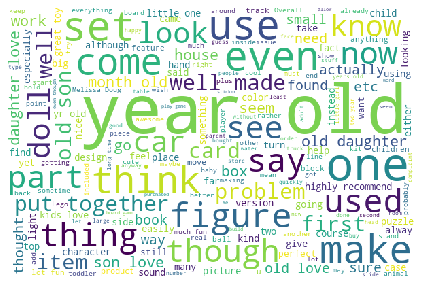

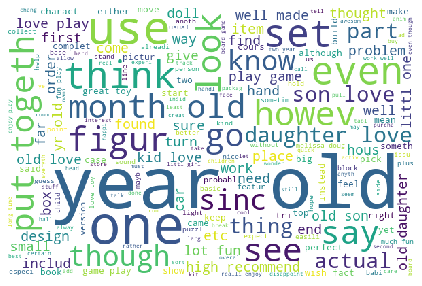

In [121]:
cloud(' '.join(dataset["reviewText"]))
cloud(' '.join(dataset["cleanReview"]))

We print the world of cloud of the original and prcessed reviewText field in order to better understand the difference between the two. 

### Distribution
Let's visualize the distribution of the length of the reviews and the distribution of the overall score.
In order to obtain this, we first count the number of words of each review and add it to our dataset.


In [103]:
#Distribution
# We need to split each words in cleaned review and then count the number of each rows of data frame.
dataset["reviewLenght"] = dataset["cleanReview"].apply(lambda x: len(str(x).split())) #Split() a string into a list where each word is a list item
dataset["summaryLenght"] = dataset["cleanSummary"].apply(lambda x: len(str(x).split()))

Now dataset looks like

In [84]:
dataset.head()

overall                                         reviewText  \
0        5  I like the item pricing. My granddaughter want...   
1        4  Love the magnet easel... great for moving to d...   
2        5  Both sides are magnetic.  A real plus when you...   
3        5  Bought one a few years ago for my daughter and...   
4        4  I have a stainless steel refrigerator therefor...   

                                             summary  \
0                                     Magnetic board   
1  it works pretty good for moving to different a...   
2                                         love this!   
3                                  Daughters love it   
4  Great to have so he can play with his alphabet...   

                                         cleanReview  \
0  like item price granddaught want mark want letter   
1  love magnet easel great move differ area wish ...   
2  side magnet real plus entertain one child four...   
3  bought one year ago daughter love still use to...   
4  stainless steel refriger therefor much space s...   

                        cleanSummary  reviewLenght  summaryLenght  
0                       magnet board             8              2  
1  work pretti good move differ area            14              6  
2                               love            40              1  
3                      daughter love            14              2  
4                great play alphabet            19              3

Now we count how many reviews have the same length and we compute an average of the length of the reviews:

In [108]:
print(dataset['reviewLenght'].value_counts(), "\n")
print("Median of review lenght: ", dataset["reviewLenght"].median())

12      6057
13      5938
11      5808
14      5630
15      5055
        ... 
1077       1
531        1
694        1
950        1
639        1
Name: reviewLenght, Length: 650, dtype: int64 

Median of review lenght:  29.0


Then, we use the catplot() function of seaborn library to visualize the distribution of the length of the reviews:

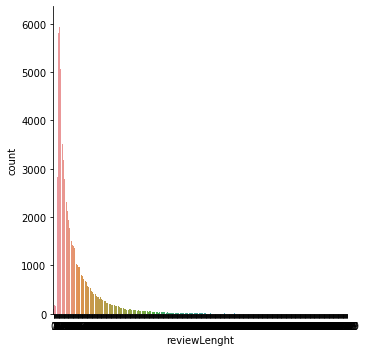

In [101]:
sns.catplot(x='reviewLenght',kind='count',data=dataset,orient="h")

The last step is to visualize the distribution of the overall score:

In [110]:
dataset['overall'].value_counts()

5    102790
4     37445
3     16357
2      6298
1      4707
Name: overall, dtype: int64

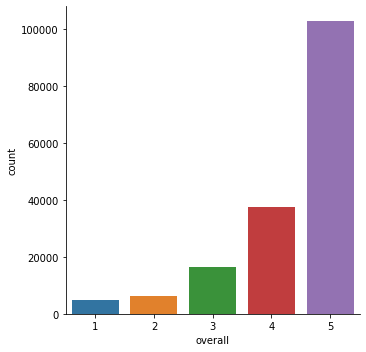

In [111]:
sns.catplot(x='overall',kind='count',data=dataset,orient="h")

For completeness, we also show the average length of the summary field's reviews

In [114]:
print("Median of summary review lenght: ", dataset["summaryLenght"].median())

Median of summary review lenght:  3.0


Note as few words as there are in this field

## Split the dataset
Usually, dataset is split into random train and test subsets. We use the train_test_split() function from scikit-learn library to do so.
![alt-text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png "Titolo")

In [443]:
#Create validation and training set
xTrain, xTest, yTrain, yTest = train_test_split(dataset["cleanReview"],
                                                 dataset["overall"],
                                                  test_size=0.2, 
                                                   random_state=1)

## Feature extraction and Bag Of Words
Even though we cleaned the data with many steps, we still have one more step to create machine learning-friendly input. One common approach is called a Bag of Words. It is simply the matrix that counts how many each word appears in documents,(or only if the word appears in document) disregarding grammar and word order. In order to do that, we use CountVectorizer() method in sklearn library. 


In [444]:
#Build vectorizer
vect = []
vect.append(CountVectorizer(binary = True))
vect.append(CountVectorizer())

We built two vectorizer: one for Bernoulli method and one for Multinomial method.
In fact,  Bernoulli expect a binary bag of words, while Multinomial expect a word counting frequency bag of words.

In [445]:
#Create bag of words representation for bernoulli model
xTrainBern = vect[0].fit_transform(xTrain) #Learn the vocabulary dictionary and return term-document matrix.
xTestBern = vect[0].transform(xTest) #Transform documents to document-term matrix. We only call transform not fit_transform due to the risk of overfitting.

#Create bag of words representation for binomial model
xTrainBin = vect[1].fit_transform(xTrain)
xTestBin = vect[1].transform(xTest)

print("Number of words in train set vocabulary:", len(vect[0].get_feature_names()), "\n")

Number of words in train set vocabulary: 47807 



### Shed some light on the bag of words representation returned from the CountVectorizer class
The following function create a dataframe from a word matrix return by CountVectorizer:

In [122]:
def wm2df(wordMatrix, featureNames):   
    # create an index for each row
    docNames = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wordMatrix)]
    dataFrame = pd.DataFrame(data=wordMatrix.toarray(), index= docNames,
                      columns=featureNames)
    return(dataFrame)

In [124]:
#set of documents
documents = ['The quick brown fox.','The the Jumps over the lazy dog!']
#instantiate the vectorizer object
cvec = CountVectorizer()
#convert the documents into a document-term matrix
wordMatrix = cvec.fit_transform(documents)
#retrieve the terms found in the corpora
featureNames = cvec.get_feature_names()
#create a dataframe from the matrix
wm2df(wordMatrix, featureNames)

brown  dog  fox  jumps  lazy  over  quick  the
Doc0      1    0    1      0     0     0      1    1
Doc1      0    1    0      1     1     1      0    3

Notice how CountVectorizer can do most of the preprocessing work done above by hand (see documentation for more options).

## Modelling
As you can see from the matrix above, text data usually is very sparse and has a high dimensionality. As described in the introduction, we use Bernoulli and Multinomial naive Bayes method for classifying our review.

In [31]:
#Build models
models = []
models.append(BernoulliNB())
models.append(MultinomialNB())

#Train models
models[0].fit(xTrainBern, yTrain)
models[1].fit(xTrainBin, yTrain)

#Make class predictions
yPredBern = models[0].predict(xTestBern)
yPredBin = models[1].predict(xTestBin)

NameError: name 'xTrainBern' is not defined

We used BernoulliNB and MultinomialNB method provided by the Scikit-learn library for instantiate and train our models.

Then we perform a series of predictions using the test sets defined above.

## Analysis 

### Accuracy
Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

![alt-text](https://miro.medium.com/max/746/1*yRa2inzTnyASJOre93ep3g.gif "Titolo")

It works well only if there are equal number of samples belonging to each class.
For example, consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy is great, but gives us the false sense of achieving high accuracy.

We use the accuracy_score() function provide by scikit-learn for calculate it:


In [447]:
print('Bernoulli Accuracy:', metrics.accuracy_score(yTest, yPredBern))
print('Multinomial Accuracy:', metrics.accuracy_score(yTest, yPredBin))

Bernoulli Accuracy: 0.5884844868735084
Multinomial Accuracy: 0.6524463007159904


__We now train our models on non-preprocessed reviews and evaluate how the processing work influenced the accuracy of our models__

First, we define a simple function to avoid code repetition:

In [451]:
def analysis(feature, target, maxFeatures = None, minDf = 1,
                             ngramRange = (1,1)):
    #Build vectorizer
    vect = []
    vect.append(CountVectorizer(binary = True, max_features = maxFeatures, min_df = minDf, ngram_range = ngramRange))
    vect.append(CountVectorizer(max_features = maxFeatures, min_df = minDf, ngram_range = ngramRange))

    xTrain, xTest, yTrain, yTest = train_test_split(feature, target, test_size=0.2, random_state=1)

    #Create bag of words representation for bernoulli model
    xTrainBern = vect[0].fit_transform(xTrain) #Learn the vocabulary dictionary and return term-document matrix.
    xTestBern = vect[0].transform(xTest) #Transform documents to document-term matrix.

    #Create bag of words representation for binomial model
    xTrainBin = vect[1].fit_transform(xTrain)
    xTestBin = vect[1].transform(xTest)

    print("Number of words in vocabulary:", len(vect[0].get_feature_names()), "\n")
    #Build models
    models = []
    models.append(BernoulliNB())
    models.append(MultinomialNB())
    
    #Train models
    models[0].fit(xTrainBern, yTrain)
    models[1].fit(xTrainBin, yTrain)

    #Make class predictions
    yPredBern = models[0].predict(xTestBern)
    yPredBin = models[1].predict(xTestBin)

    print('Bernoulli Accuracy:', metrics.accuracy_score(yTest, yPredBern))
    print('Multinomial Accuracy:', metrics.accuracy_score(yTest, yPredBin))
    

In [452]:
analysis(dataset['reviewText'],dataset['overall'])

Number of words in vocabulary: 73444 

Bernoulli Accuracy: 0.5786992840095465
Multinomial Accuracy: 0.6553699284009546


Clearly, even if the number of feature is smaller (47807 vs 73444), the preprocessing work had only a small impact on the accuracy of both model.

__What if we drastically reduce the number of features?__

In [453]:
analysis(dataset['reviewText'],dataset['overall'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.547255369928401
Multinomial Accuracy: 0.6060560859188544


In [441]:
analysis(dataset['cleanReview'],dataset['overall'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.6014569125852449
Multinomial Accuracy: 0.6255114693118413


__What if we use our classifiers on shorter reviews?__
__Let's try to use the summary field instead of reviewText field:__

In [361]:
analysis(dataset['summary'],dataset['overall'])

Number of words in vocabulary: 17224 

Bernoulli Accuracy: 0.6506563245823389
Multinomial Accuracy: 0.6587410501193317


In [362]:
analysis(dataset['cleanSummary'],dataset['overall'])

Number of words in vocabulary: 12009 

Bernoulli Accuracy: 0.645346062052506
Multinomial Accuracy: 0.6481801909307876


__In this case, the performance of the Bernoulli model is considerably increased.__

__Moreover, in case the reviews are short and the number of elements in the vocabulary are few, the Bernoulli model outperform for the first time the Multinomial model:__

In [363]:
analysis(dataset['summary'],dataset['overall'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.63645584725537
Multinomial Accuracy: 0.634307875894988


In [364]:
analysis(dataset['cleanSummary'],dataset['overall'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.6158412887828162
Multinomial Accuracy: 0.6131861575178997


### Sentiment analysis: predict only if the reviews are positive or negative
Suppose we now want to evaluate only if a review is positive or negative, rather than the overall score.

We consider a positive review if it has a score strictly higher than 2, negative if it has a score strictly less than 2. We ignore the reviews with a score equal to 2.

We then add a new "sentiment" attribute to our dataset.

In [18]:
def sentiment(x):
  if x == 2:
    return np.nan
  if x<2:
    return 0
  if x>2:
    return 1
  
#Add sentiment of each review
dataset["sentiment"] = dataset["overall"].apply(sentiment)

#Delete review with score equal to 2
dataset = dataset.dropna()

print("New dataset look like: \n")
dataset.iloc[:2]

New dataset look like: 



overall                                         reviewText  \
0        5  I like the item pricing. My granddaughter want...   
1        4  Love the magnet easel... great for moving to d...   

                                             summary  \
0                                     Magnetic board   
1  it works pretty good for moving to different a...   

                                         cleanReview  \
0  like item price granddaught want mark want letter   
1  love magnet easel great move differ area wish ...   

                        cleanSummary  sentiment  
0                       magnet board        1.0  
1  work pretti good move differ area        1.0

We repeat all the tests carried out previously and observe, as is natural, how the best accuracy increase and how some result differ:

In [368]:
analysis(dataset['cleanReview'],dataset['sentiment'])

Number of words in vocabulary: 46798 

Bernoulli Accuracy: 0.957470551766894
Multinomial Accuracy: 0.9751394916305022


In [369]:
analysis(dataset['reviewText'],dataset['sentiment'])

Number of words in vocabulary: 72064 

Bernoulli Accuracy: 0.9484500929944203
Multinomial Accuracy: 0.9758524488530688


In [371]:
analysis(dataset['cleanReview'],dataset['sentiment'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.971264724116553
Multinomial Accuracy: 0.9590514569125852


In [372]:
analysis(dataset['reviewText'],dataset['sentiment'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.9614693118412895
Multinomial Accuracy: 0.9523248605083695


__In this case results differ__

In [373]:
analysis(dataset['summary'],dataset['sentiment'])

Number of words in vocabulary: 16936 

Bernoulli Accuracy: 0.971264724116553
Multinomial Accuracy: 0.9731556106633602


In [377]:
analysis(dataset['cleanSummary'],dataset['sentiment'])

Number of words in vocabulary: 11821 

Bernoulli Accuracy: 0.9713887166769993
Multinomial Accuracy: 0.9730006199628022


In [375]:
analysis(dataset['summary'],dataset['sentiment'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.9712957222566646
Multinomial Accuracy: 0.9690638561686299


In [376]:
analysis(dataset['cleanSummary'],dataset['sentiment'], maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.971264724116553
Multinomial Accuracy: 0.9705207687538747


### Playing with parameters
Below we do some test with the CountVector function, trying to improve accuracy score with overall label.

We set min_df = 2 and ngram_range = (1,3): min_df = 2 means that, in order to include the vocabulary in the matrix, one word must appear in at least two documents. ngram_range means that we cut one sentence by number of ngram. Let's say we have one sentence, I am a boy. If we cut the sentence by digram (ngram=2) then the sentence would be cut like this ["I am","am a", "a boy"]. The result of accuracy can be highly dependent on parameters.

In [463]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 2)

Number of words in vocabulary: 22591 

Bernoulli Accuracy: 0.607997520148791
Multinomial Accuracy: 0.6719466831990081


In [467]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 3)

Number of words in vocabulary: 17678 

Bernoulli Accuracy: 0.6088964662120273
Multinomial Accuracy: 0.6709237445753254


In [464]:
analysis(dataset['cleanReview'],dataset['overall'], ngramRange = (1,3))

Number of words in vocabulary: 6554026 

Bernoulli Accuracy: 0.6351828890266584
Multinomial Accuracy: 0.6398946063236206


In [468]:
analysis(dataset['cleanReview'],dataset['overall'], ngramRange = (1,4))

Number of words in vocabulary: 12080894 

Bernoulli Accuracy: 0.634903905765654
Multinomial Accuracy: 0.6384686918784873


In [460]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 2, ngramRange = (1,3))

Number of words in vocabulary: 1027090 

Bernoulli Accuracy: 0.6311531308121513
Multinomial Accuracy: 0.6775573465592064


In [461]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 2, ngramRange = (1,4))

Number of words in vocabulary: 1164417 

Bernoulli Accuracy: 0.6317420954742715
Multinomial Accuracy: 0.6756354618722876


In [475]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 2, ngramRange = (1,3), maxFeatures = 50)

Number of words in vocabulary: 50 

Bernoulli Accuracy: 0.6004959702417855
Multinomial Accuracy: 0.6245815251084935


In [462]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 3, ngramRange = (1,3))

Number of words in vocabulary: 524095 

Bernoulli Accuracy: 0.6253254804711718
Multinomial Accuracy: 0.6831990080595164


In [469]:
analysis(dataset['cleanReview'],dataset['overall'], minDf = 3, ngramRange = (1,4))

Number of words in vocabulary: 562252 

Bernoulli Accuracy: 0.6252324860508369
Multinomial Accuracy: 0.6810601363918165


In [470]:
analysis(dataset['cleanReview'],dataset['sentiment'], minDf = 2)

Number of words in vocabulary: 22591 

Bernoulli Accuracy: 0.9424054556726597
Multinomial Accuracy: 0.9670179789212647


In [472]:
analysis(dataset['cleanReview'],dataset['sentiment'], ngramRange = (1,3))

Number of words in vocabulary: 6554026 

Bernoulli Accuracy: 0.9710787352758834
Multinomial Accuracy: 0.9713577185368878


In [473]:
analysis(dataset['cleanReview'],dataset['sentiment'], minDf = 2, ngramRange = (1,3))

Number of words in vocabulary: 1027090 

Bernoulli Accuracy: 0.9650340979541228
Multinomial Accuracy: 0.9718536887786733


In [476]:
analysis(dataset['cleanSummary'],dataset['overall'], minDf = 2)

Number of words in vocabulary: 6749 

Bernoulli Accuracy: 0.6697148171109734
Multinomial Accuracy: 0.6735275883446993


In [490]:
analysis(dataset['cleanSummary'],dataset['overall'], minDf = 5)

Number of words in vocabulary: 3950 

Bernoulli Accuracy: 0.6718226906385617
Multinomial Accuracy: 0.6736205827650341


In [482]:
analysis(dataset['cleanSummary'],dataset['overall'],  ngramRange = (1,3))

Number of words in vocabulary: 233460 

Bernoulli Accuracy: 0.6442653440793552
Multinomial Accuracy: 0.675759454432734


In [483]:
analysis(dataset['cleanSummary'],dataset['overall'],  ngramRange = (1,4))

Number of words in vocabulary: 306440 

Bernoulli Accuracy: 0.6401425914445134
Multinomial Accuracy: 0.6745195288282703


In [485]:
analysis(dataset['cleanSummary'],dataset['overall'], minDf = 2, ngramRange = (1,3))

Number of words in vocabulary: 41218 

Bernoulli Accuracy: 0.6704587724736516
Multinomial Accuracy: 0.6769993800371977


In [486]:
analysis(dataset['cleanSummary'],dataset['overall'], minDf = 2, ngramRange = (1,4))

Number of words in vocabulary: 43493 

Bernoulli Accuracy: 0.6703657780533168
Multinomial Accuracy: 0.6771853688778673


In [487]:
analysis(dataset['cleanSummary'],dataset['overall'], minDf = 3, ngramRange = (1,3))

Number of words in vocabulary: 22129 

Bernoulli Accuracy: 0.670117792932424
Multinomial Accuracy: 0.6744885306881587


In [488]:
analysis(dataset['cleanSummary'],dataset['overall'], minDf = 3, ngramRange = (1,4))

Number of words in vocabulary: 22833 

Bernoulli Accuracy: 0.6697768133911965
Multinomial Accuracy: 0.6744265344079355


### Learning curve

Let’s say we have some data and split it into a training set and validation set. We take one single instance from the training set and use it to estimate a model. Then we measure the model’s error on the validation set and on that single training instance. The error on the training instance will be 0, since it’s quite easy to perfectly fit a single data point. The error on the validation set, however, will be very large.

That’s because the model is built around a single instance, and it almost certainly won’t be able to generalize accurately on data that hasn’t seen before. Now let’s say that instead of one training instance, we take ten and repeat the error measurements. Then we take fifty, one hundred, five hundred, until we use our entire training set. The error scores will vary more or less as we change the training set. We thus have two error scores to monitor: one for the validation set, and one for the training sets. If we plot the evolution of the two error scores as training sets change, we end up with two curves. These are called learning curves. In a nutshell, a learning curve shows how error changes as the training set size increases.

To draw the learning curve we use the function learning_curve provided by the Sci-kit library:  estimator is the model with which we wish to perform the tests,  X the complete set of features, y the complete set of targets, train_sizes is a list containing training set sizes we want to use for generating the learning curves. The default function split X in training set and test set, with an 80:20 ratio, so the maximum value we could enter in this field will be 80% of the overall size of X.
An important thing to be aware of is that the function is using k-cross-validation, so k models will be trained for each training size (where k is the number of folds used for cross-validation).

As an example, we plot the learning curve of both model taking as feature vector the cleanReview columns and as target vector the sentiment and the overall column:

In [4]:
def dataPlotPreparation( X, y, maxFeatures = None, minDf = 1,ngramRange = (1,1)):
    #Build vectorizer
    vect = []
    vect.append(CountVectorizer(binary = True, max_features= maxFeatures, min_df = minDf, ngram_range = ngramRange))
    vect.append(CountVectorizer( max_features= maxFeatures, min_df = minDf, ngram_range = ngramRange))

    #Convert in bag of words representation the entire dataset
    XBern = vect[0].fit_transform(X)
    XBin = vect[1].fit_transform(X)
    y = y
    
    print("Number of words in vocabulary :", len(vect[0].get_feature_names()), "\n")
    #Build models
    models = []
    models.append(BernoulliNB())
    models.append(MultinomialNB())
            
    #Train models
    models[0].fit(XBern, y)
    models[1].fit(XBin, y)
    
    return XBern, XBin, y


    

In [456]:
#Generate learning curve
def plotLearningCurve(estimator, X, y, trainSizes, title):
    #generate learning curve for bernoulli model
    trainSizes, trainScores, validationScores = learning_curve(estimator = estimator, 
                                                            X = X,
                                                             y = y, 
                                                              train_sizes = trainSizes,
                                                                scoring = 'accuracy',
                                                                 n_jobs=-1,
                                                                  cv = 5)

    #Print scores
    #print('Training scores:\n\n', trainScores)
    #print('\nValidation scores:\n\n', validationScores)

    #Calculate the mean
    trainScoresMean = trainScores.mean(axis = 1)
    validationScoresMean = validationScores.mean(axis = 1)
    #print('Mean training scores\n\n', pd.Series(trainScoresMean, index = trainSizes))
    #print('\nMean validation scores\n\n',pd.Series(validationScoresMean, index = trainSizes))
    trainScoresStd = np.std(trainScores, axis=1)
    validationScoresStd = np.std(validationScores, axis=1)

    #Plot
    plt.style.use('seaborn')
    plt.plot(trainSizes, trainScoresMean, 'o-', label = 'Training accuracy')
    plt.plot(trainSizes, validationScoresMean, 'o-', label = 'Validation accuracy')
    plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
                     trainScoresMean + trainScoresStd, alpha=0.1,
                     color="b")
    plt.fill_between(trainSizes, validationScoresMean - validationScoresStd,
                     validationScoresMean + validationScoresStd, alpha=0.1, color="g")
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.3,1.2)
    


In [459]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanReview"], dataset["sentiment"], maxFeatures = None)


Number of words in vocabulary : 52421 



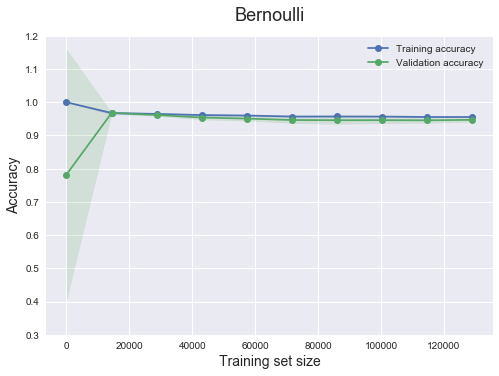

In [419]:
plotLearningCurve(estimator = models[0], 
                  X = XBern, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")

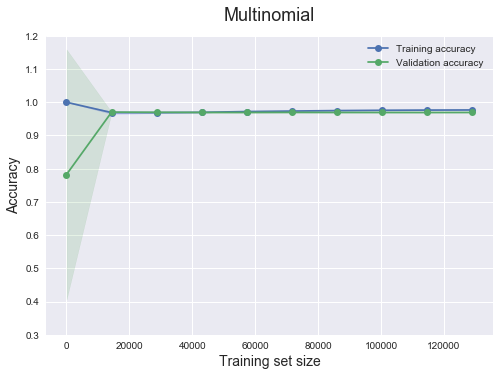

In [420]:
plotLearningCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

In [491]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanReview"], dataset["overall"], maxFeatures = None)

Number of words in vocabulary : 52421 



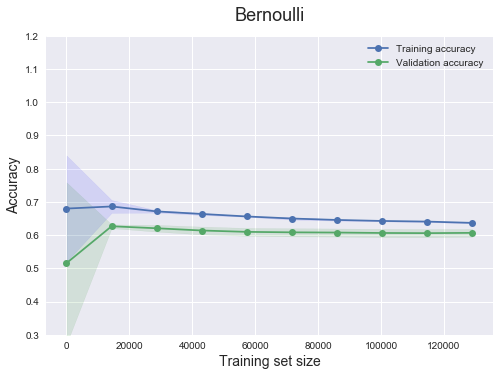

In [492]:
plotLearningCurve(estimator = models[0], 
                  X = XBern, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")

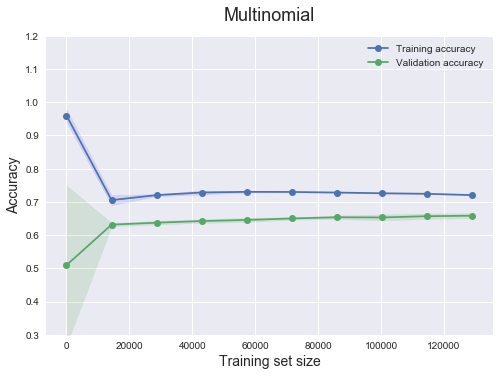

In [493]:
plotLearningCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

#### A note on K-fold cross validation
Learning_curve() use the k-fold cross validation methodology for performing test on training set.
K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

![alt-text](https://miro.medium.com/max/3018/1*IjKy-Zc9zVOHFzMw2GXaQw.png "Titolo")

##### A note on Laplace smoothing
Additive smoothing, also called Laplace smoothing, or Lidstone smoothing, is a technique used to smooth categorical data.

Given an observation x = (x1, …, xd) from a multinomial distribution with N trials and parameter vector θ = (θ1, …, θd), a "smoothed" version of the data gives the estimator:

![alt-text](https://miro.medium.com/max/650/0*TV46eIaERsF_EF40.png "Titolo")

where the pseudocount α > 0 is the smoothing parameter (α = 0 corresponds to no smoothing).

BernoulliNB() and MultinomialNB() implementation of Naive Bayes method in Scikit-learn set the value of a to 1 by default. 


### A comparison between the Bernoulli and the Multinomial model
To better compare the two models, we can compare their validation accuracy on all previously defined tests, taking as a reference the fields with preprocessed text.

In [5]:
#Generate learning curve
def plotValidationCurve(estimator, X, y, trainSizes, title):
    #generate learning curve for bernoulli model
    trainSizes, trainScores, validationScores = learning_curve(estimator = estimator, 
                                                            X = X,
                                                             y = y, 
                                                              train_sizes = trainSizes,
                                                                scoring = 'accuracy',
                                                                 n_jobs=-1,
                                                                  cv = 5)

    #Print scores
    #print('Training scores:\n\n', trainScores)
    #print('\nValidation scores:\n\n', validationScores)

    #Calculate the mean
    trainScoresMean = trainScores.mean(axis = 1)
    validationScoresMean = validationScores.mean(axis = 1)
    #print('Mean training scores\n\n', pd.Series(trainScoresMean, index = trainSizes))
    #print('\nMean validation scores\n\n',pd.Series(validationScoresMean, index = trainSizes))
    trainScoresStd = np.std(trainScores, axis=1)
    validationScoresStd = np.std(validationScores, axis=1)

    #Plot
    plt.style.use('seaborn')
    plt.plot(trainSizes, validationScoresMean, 'o-', label = title)

    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title("Comparison", fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.3,1.2)

Number of words in vocabulary : 52421 



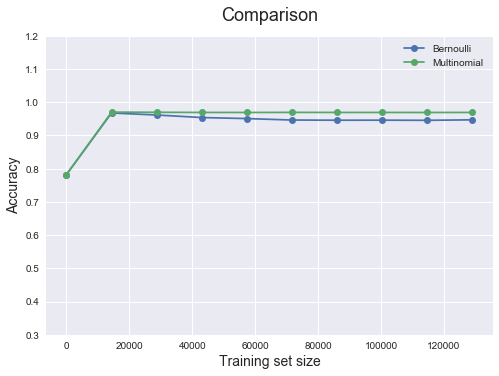

In [494]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanReview"], dataset["sentiment"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 52421 



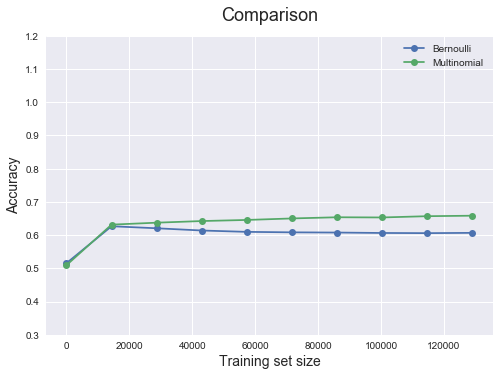

In [495]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanReview"], dataset["overall"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 50 



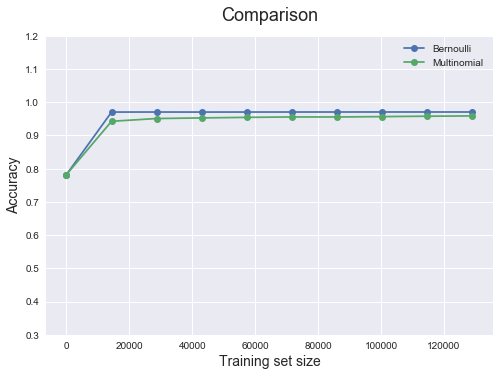

In [516]:
XBern, XBin, y = dataPlotPreparation( dataset['cleanReview'],dataset['sentiment'], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 50 



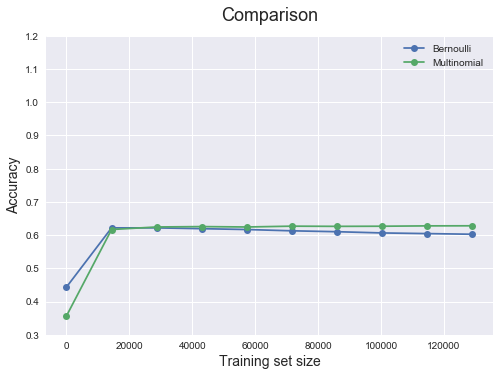

In [430]:
XBern, XBin, y = dataPlotPreparation( dataset['cleanReview'],dataset['overall'], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 12977 



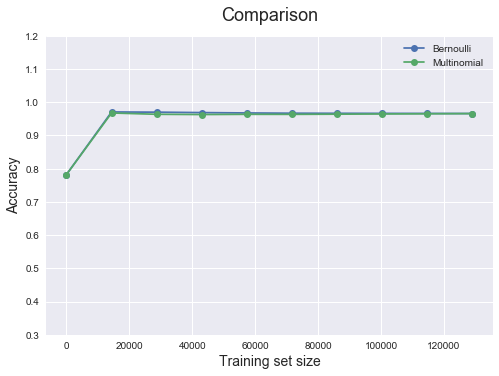

In [431]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanSummary"], dataset["sentiment"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 12977 



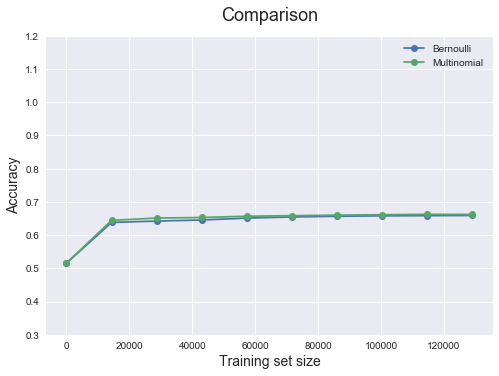

In [432]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanSummary"], dataset["overall"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 50 



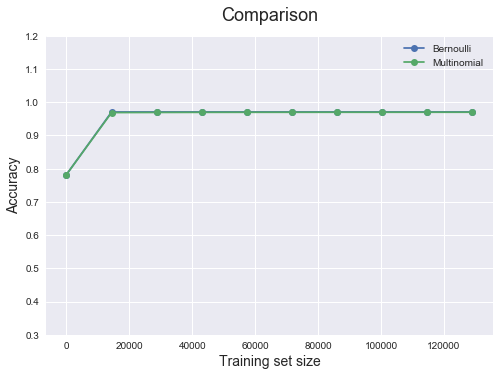

In [433]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanSummary"], dataset["sentiment"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 50 



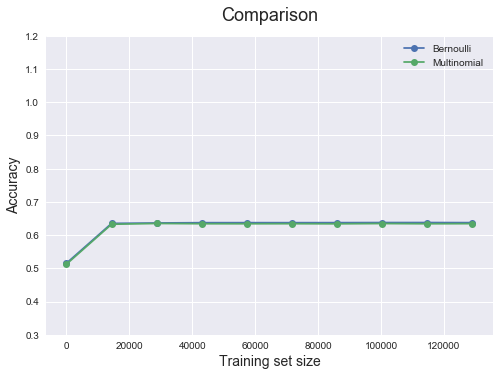

In [435]:
XBern, XBin, y = dataPlotPreparation( dataset["cleanSummary"], dataset["overall"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

## A comparison between the Bernoulli and the Multinomial model - other dataset
I will use the Digital Music subset and the Grocery and Gourmet subset available from http://jmcauley.ucsd.edu/data/amazon/ .

First, to make the result comparable with the first Toys and Games dataset, i will do the same preprocessing works.


In [26]:
#Load dataset in a panda DataFrame
df = pd.read_json('./Dataset/Digital_Music_5.json',lines=True)

digitalMusicDs = pd.DataFrame()
digitalMusicDs["overall"] = df["overall"]
digitalMusicDs["reviewText"] = df["reviewText"]
digitalMusicDs["summary"] = df["summary"]

#Apply data cleaning and text preprocessing to all dataset
#Add the processed data to the original data. 
digitalMusicDs["cleanReview"] = digitalMusicDs["reviewText"].apply(cleaning)
digitalMusicDs["cleanSummary"] = digitalMusicDs["summary"].apply(cleaning)

#Add sentiment of each review
digitalMusicDs["sentiment"] = digitalMusicDs["overall"].apply(sentiment)

#Review length
digitalMusicDs["reviewLenght"] = digitalMusicDs["cleanReview"].apply(lambda x: len(str(x).split())) #Split() a string into a list where each word is a list item
digitalMusicDs["summaryLenght"] = digitalMusicDs["cleanSummary"].apply(lambda x: len(str(x).split()))

#Add sentiment of each review
digitalMusicDs["sentiment"] = digitalMusicDs["overall"].apply(sentiment)

#Delete review with score equal to 2
digitalMusicDs = digitalMusicDs.dropna()



#Save processed data set in order to retrieve it
digitalMusicDs.to_pickle("./Dataset/processedDigitalMusic.pkl")

Visualize some information about the digital music dataset:

In [27]:
#Save processed data set in order to retrieve it
digitalMusicDs = pd.read_pickle("./Dataset/processedDigitalMusic.pkl")
print(digitalMusicDs.shape)
print("Median of review lenght: ", digitalMusicDs["reviewLenght"].median())
digitalMusicDs.iloc[:2]


(61696, 8)
Median of review lenght:  76.0


overall                                         reviewText  \
0        5  It's hard to believe "Memory of Trees" came ou...   
1        5  A clasically-styled and introverted album, Mem...   

                    summary  \
0   Enya's last great album   
1  Enya at her most elegant   

                                         cleanReview           cleanSummary  \
0  hard believ memori tree came year ago held wel...  enya last great album   
1  clasic style introvert album memori tree maste...              enya eleg   

   sentiment  reviewLenght  summaryLenght  
0        1.0            89              4  
1        1.0            54              2

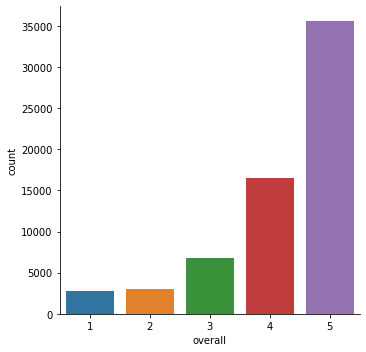

In [7]:
sns.catplot(x='overall',kind='count',data=digitalMusicDs,orient="h")

In [28]:
#Load dataset in a panda DataFrame
df = pd.read_json('./Dataset/Grocery_and_Gourmet_Food_5.json',lines=True)

groceryAndGourmetFoodDs = pd.DataFrame()
groceryAndGourmetFoodDs["overall"] = df["overall"]
groceryAndGourmetFoodDs["reviewText"] = df["reviewText"]
groceryAndGourmetFoodDs["summary"] = df["summary"]

#Apply data cleaning and text preprocessing to all dataset
#Add the processed data to the original data. 
groceryAndGourmetFoodDs["cleanReview"] = groceryAndGourmetFoodDs["reviewText"].apply(cleaning)
groceryAndGourmetFoodDs["cleanSummary"] = groceryAndGourmetFoodDs["summary"].apply(cleaning)

#Add sentiment of each review
groceryAndGourmetFoodDs["sentiment"] = groceryAndGourmetFoodDs["overall"].apply(sentiment)

#Review length
groceryAndGourmetFoodDs["reviewLenght"] = groceryAndGourmetFoodDs["cleanReview"].apply(lambda x: len(str(x).split())) #Split() a string into a list where each word is a list item
groceryAndGourmetFoodDs["summaryLenght"] = groceryAndGourmetFoodDs["cleanSummary"].apply(lambda x: len(str(x).split()))

#Add sentiment of each review
groceryAndGourmetFoodDs["sentiment"] = groceryAndGourmetFoodDs["overall"].apply(sentiment)

#Delete review with score equal to 2
groceryAndGourmetFoodDs = groceryAndGourmetFoodDs.dropna()

#Save processed data set in order to retrieve it
groceryAndGourmetFoodDs.to_pickle("./Dataset/processedGroceryAndGourmetFood.pkl")

Visualize some information about grocery and food dataset:

In [29]:
#Save processed data set in order to retrieve it
groceryAndGourmetFoodDs = pd.read_pickle("./Dataset/processedGroceryAndGourmetFood.pkl")
print(groceryAndGourmetFoodDs.shape)
print("Median of review lenght: ", groceryAndGourmetFoodDs["reviewLenght"].median())
groceryAndGourmetFoodDs.iloc[:2]


(143337, 8)
Median of review lenght:  32.0


overall                                         reviewText  \
0        4  Just another flavor of Kit Kat but the taste i...   
1        3  I bought this on impulse and it comes from Jap...   

                                             summary  \
0                                         Good Taste   
1  3.5 stars,  sadly not as wonderful as I had hoped   

                                         cleanReview          cleanSummary  \
0  anoth flavor kit kat tast uniqu bit differ thi...             good tast   
1  bought impuls come japan amus famili weird sta...  star sad wonder hope   

   sentiment  reviewLenght  summaryLenght  
0        1.0            14              2  
1        1.0            50              4

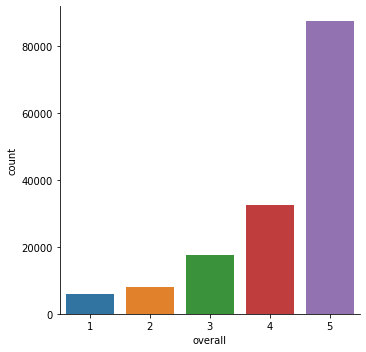

In [9]:
sns.catplot(x='overall',kind='count',data=groceryAndGourmetFoodDs,orient="h")

## Let's do the test
we repeat in the same order all the test done on previus chapter

### Digital music dataset

In [32]:
models = []
models.append(BernoulliNB())
models.append(MultinomialNB())

Number of words in vocabulary : 77050 



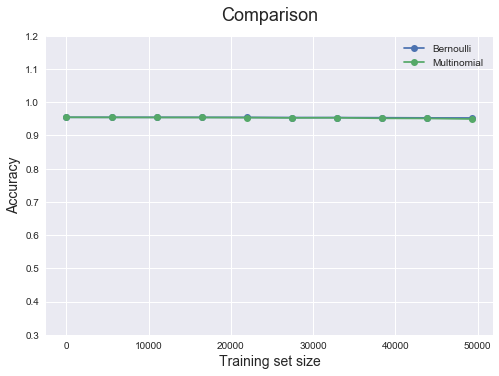

In [33]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanReview"], digitalMusicDs["sentiment"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 77050 



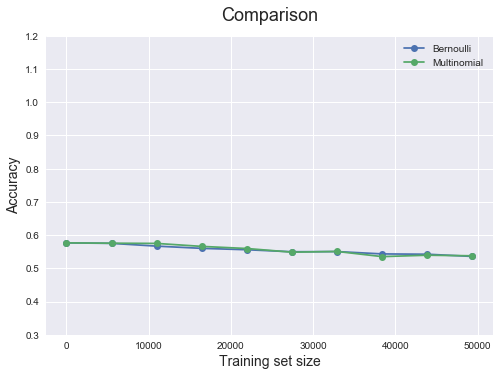

In [34]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanReview"], digitalMusicDs["overall"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 50 



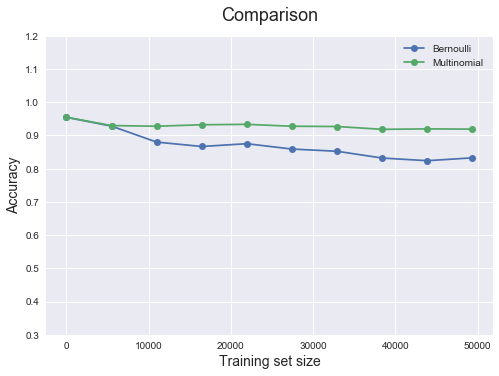

In [35]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanReview"], digitalMusicDs["sentiment"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 50 



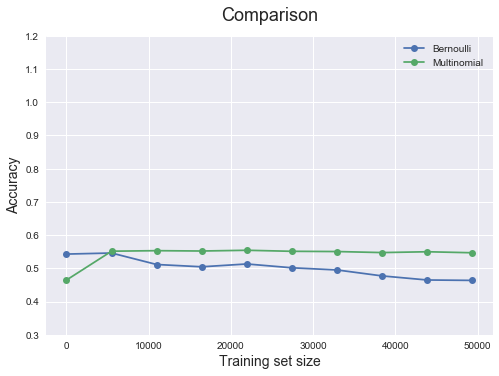

In [36]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanReview"], digitalMusicDs["overall"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Multinomial")

Number of words in vocabulary : 12704 



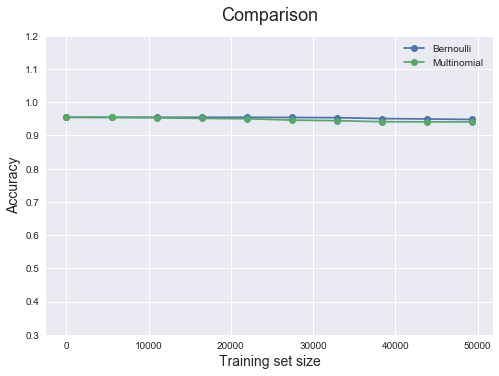

In [37]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanSummary"], digitalMusicDs["sentiment"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 12704 



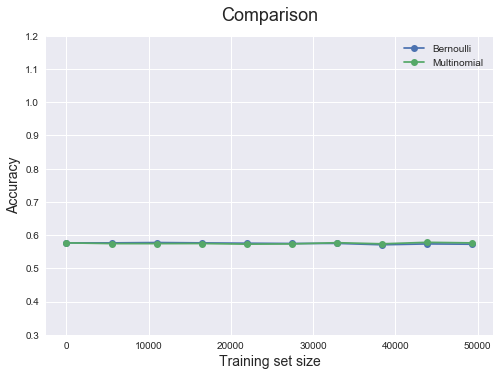

In [38]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanSummary"], digitalMusicDs["overall"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50 



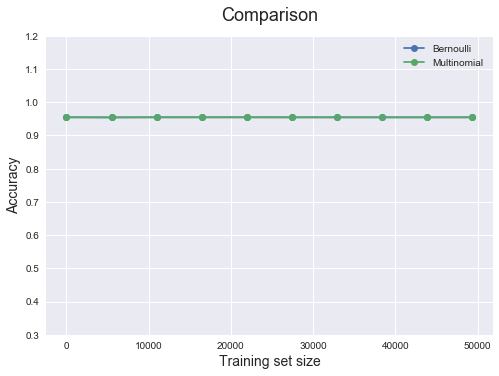

In [39]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanSummary"], digitalMusicDs["sentiment"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50 



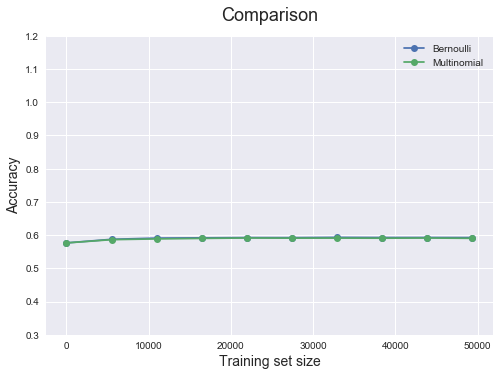

In [41]:
XBern, XBin, y = dataPlotPreparation( digitalMusicDs["cleanSummary"], digitalMusicDs["overall"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

### Grocery and gourmet food dataset

Number of words in vocabulary : 50848 



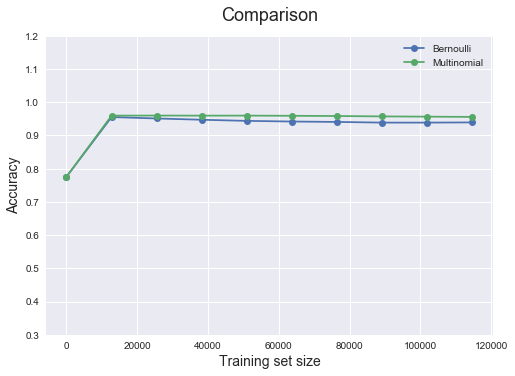

In [42]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanReview"], groceryAndGourmetFoodDs["sentiment"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50848 



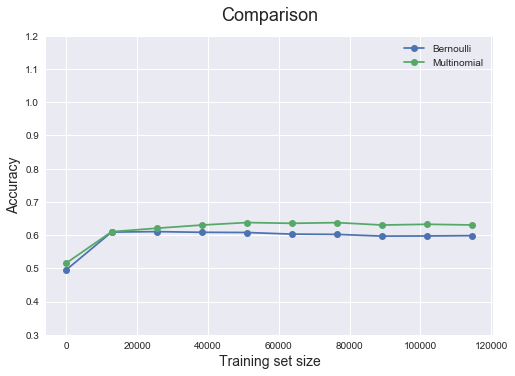

In [43]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanReview"], groceryAndGourmetFoodDs["overall"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50 



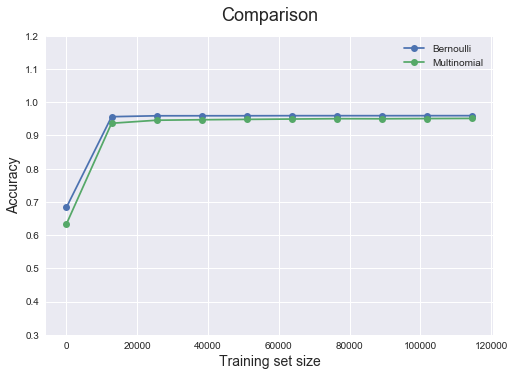

In [44]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanReview"], groceryAndGourmetFoodDs["sentiment"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50 



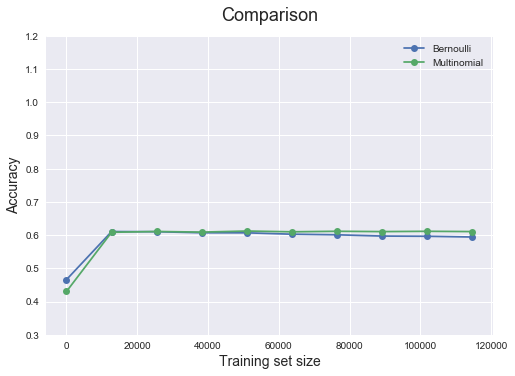

In [45]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanReview"], groceryAndGourmetFoodDs["overall"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 11685 



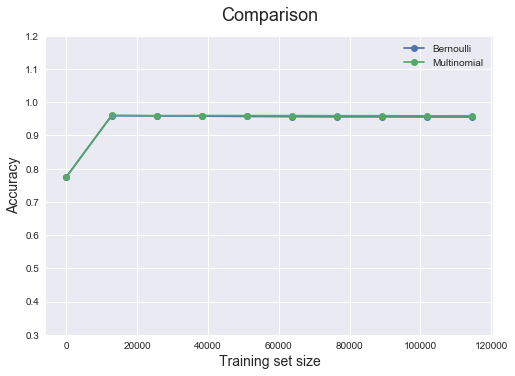

In [46]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanSummary"], groceryAndGourmetFoodDs["sentiment"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 11685 



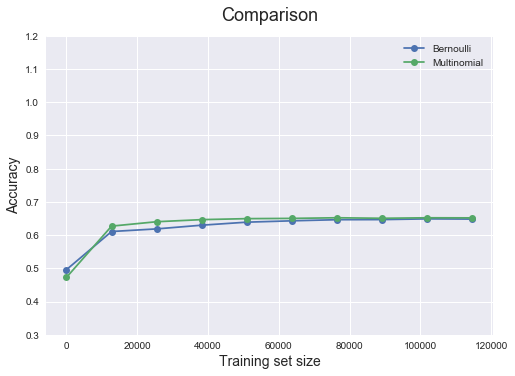

In [47]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanSummary"], groceryAndGourmetFoodDs["overall"], maxFeatures = None)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50 



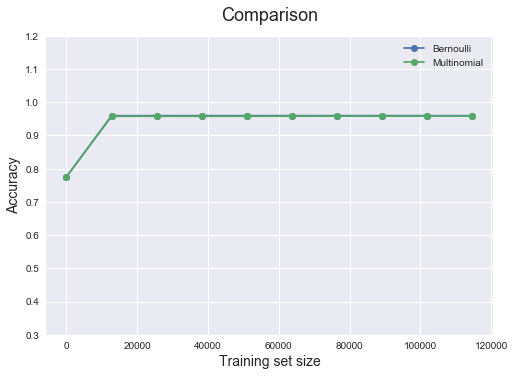

In [48]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanSummary"], groceryAndGourmetFoodDs["sentiment"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")

Number of words in vocabulary : 50 



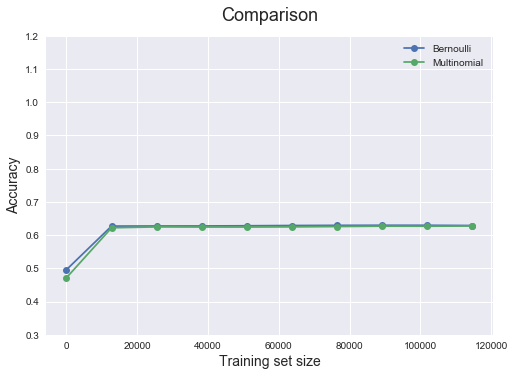

In [49]:
XBern, XBin, y = dataPlotPreparation( groceryAndGourmetFoodDs["cleanSummary"], groceryAndGourmetFoodDs["overall"], maxFeatures = 50)

plotValidationCurve(estimator = models[0], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                     title="Bernoulli")
plotValidationCurve(estimator = models[1], 
                  X = XBin, 
                   y = y, 
                    trainSizes = np.linspace(20, XBern.shape[0]-(XBern.shape[0]*20)/100-1, 10, dtype = "int"),
                    title="Multinomial")